<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Consumption_Trends_2020/EDA/0929_corona_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 모듈 설치하기

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. 코로나 일별 확진자 가져오기

In [ ]:
mcorp = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/Mcorp_all.csv', encoding='utf8')

In [ ]:
corona = pd.read_excel('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/코로나확진자/Covid19InfState.xlsx', encoding='CP949')
corona = corona[['stateDt','decideCnt']]

In [ ]:
# 날짜 중복값 처리
corona['stateDt'] = corona['stateDt'].astype('str')
corona = corona.drop_duplicates(['stateDt'], keep='last').reset_index()

# 결측치 처리
corona['stateDt'][0] = 20200201
corona.decideCnt.iloc[0] = 0.0
corona.decideCnt.iloc[3] = 15.0
corona[235:240]

corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      238 non-null    int64  
 1   stateDt    238 non-null    object 
 2   decideCnt  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
corona.tail()

,index,stateDt,decideCnt
233,267,20200921,23045.0
234,268,20200922,23106.0
235,269,20200923,23216.0
236,270,20200924,23341.0
237,271,20200925,23455.0


In [ ]:
# 일별 확진자 수 구하기
before = 0
corona['subs'] = 0
for i, x  in enumerate(corona.decideCnt):
  corona['subs'][i] = x-before
  before = x
corona.drop('index',axis=1, inplace=True)
corona.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,stateDt,decideCnt,subs
0,20200201,0.0,0
1,20200202,2.0,2
2,20200203,15.0,13
3,20200204,15.0,0
4,20200205,19.0,4


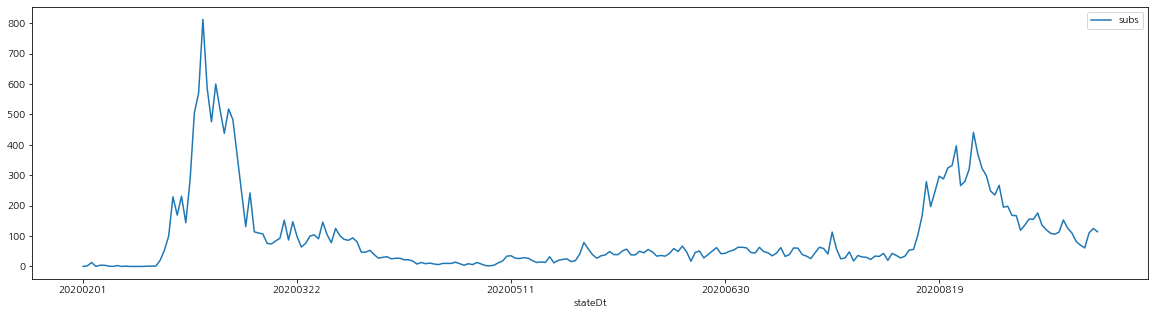

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)
corona.plot(x='stateDt', y='subs')
plt.show()

## 2. mcorp 날짜별 시각화하기

In [ ]:
mcorp = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/Mcorp_all.csv', encoding='utf8')

In [ ]:
mcorp.columns

Index(['구매날짜', '카테고리명', '고객성별', '고객나이', 'OS유형', '구매금액', '구매수'], dtype='object')

In [ ]:
corona.columns

Index(['stateDt', 'decideCnt', 'subs'], dtype='object')

In [ ]:
corona.columns=['구매날짜','누적확진자','일일확진자']

In [ ]:
categories = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/04_kdx/data_in/Mcorporation/KDX_CONTEST_파일정의서.xlsx')['xlsx 파일 이름'].values
categories = list(categories)
categories[:5]

['PC사무기기', 'TV홈시어터', '가공식품', '가방지갑잡화', '건강식품']

In [ ]:
def categorical_cnt(category='category',sdate=20200101, edate=20201231):
  df = pd.DataFrame(mcorp[mcorp['카테고리명']==category].groupby(['구매날짜'])['구매수'].sum())
  df = df[df.index >= sdate]
  df = df[df.index <= edate]
  df.index = df.index.astype('str')
  return df

In [ ]:
def categorical_won(category='category',sdate=20200101, edate=20201231):
  df = pd.DataFrame(mcorp[mcorp['카테고리명']==category].groupby(['구매날짜'])['구매금액'].sum())
  df = df[df.index >= sdate]
  df = df[df.index <= edate]
  df.index = df.index.astype('str')
  return df

In [ ]:
def corona_cnt(sdate=20200101, edate=20201231):
  df_corona = corona[['구매날짜','일일확진자']]
  df_corona.구매날짜 = df_corona.구매날짜.astype('int64')
  df_corona = df_corona[df_corona.구매날짜 >= sdate]
  df_corona = df_corona[df_corona.구매날짜 <= edate]
  df_corona.구매날짜 = df_corona.구매날짜.astype('str')
  return df_corona

In [ ]:
sday = 20200201
eday = 20200401
step = 7
category = '신발'
def mcorp_plot(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_cnt(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  corr = stats.pearsonr(df_new.구매수, df_new.일일확진자)
  print("*"*50)
  print(category+" 상관관계: ", corr)
  xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
  xdays = [df_new.구매날짜[i] for i in xtic]

  plt.rcParams["figure.figsize"]=(24,6)
  fig, ax1 = plt.subplots()

  df_new['구매수'].plot(kind='bar', color='olivedrab',ax=ax1)
  ax1.set_ylabel(category + " 구매건수")

  ax2  = ax1.twinx()
  ax2.set_ylabel("확진자수")
  df_new['일일확진자'].plot(color='firebrick', ax=ax2, linewidth=5)

  plt.xticks(xtic)
  ax1.set_xticklabels(xdays, rotation=45)

  plt.title(category + " 구매건수와 일일확진자")
  fig.tight_layout()
  plt.legend()
  plt.show()
  return corr

In [ ]:
def mcorp_plot_won(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_won(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  corr = stats.pearsonr(df_new.구매금액, df_new.일일확진자)
  print("*"*50)
  print(category+" 상관관계: ", corr)
  xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
  xdays = [df_new.구매날짜[i] for i in xtic]

  plt.rcParams["figure.figsize"]=(24,6)
  fig, ax1 = plt.subplots()

  df_new['구매금액'].plot(kind='bar', color='darkgrey',ax=ax1)
  ax1.set_ylabel(category + " 구매금액")

  ax2  = ax1.twinx()
  ax2.set_ylabel("확진자수")
  df_new['일일확진자'].plot(color='firebrick', ax=ax2, linewidth=5)

  plt.xticks(xtic)
  ax1.set_xticklabels(xdays, rotation=45)

  plt.title(category + " 구매금액과 일일확진자")
  fig.tight_layout()
  plt.legend()
  plt.show()
  return corr

In [ ]:
mcorp.카테고리명.unique()

array(['PC사무기기', 'TV홈시어터', '가공식품', '가방지갑잡화', '건강식품', '골프용품', '공구류', '구기',
       '기타 스포츠', '낚시', '남성의류', '계절가전', '노트북', '농축수산물', '도서음반', '등산용품',
       '메이크업', '문구사무용품', '미용가전', '반려동물', '생활용품', '생활가구', '생활가전', '서비스티켓',
       '성인용품', '세탁청소세면', '수납용품', '수납가구', '수영', '스키보드', '스킨케어', '스포츠의류',
       '신발', '악세서리시계주얼리', '안전용품', '언더웨어', '업소위생용품', '여성의류', '국내외여행',
       '완구키덜트게임', '욕실용품', '욕실가전', '유아용품', '유아패션', '음료', '음향가전', '인테리어용품',
       '자동차용품', '자전거사이클보드인라인', '주방가전', '주방수납잡화', '주방식기용기', '주방조리기구',
       '출산임부용품', '취미악기', '침실가구', '침실인테리어', '카메라캠코더', '캠핑용품', '테마의류',
       '헤어바디용품', '헬스기구용품', '건강관련용품', '휴대폰악세서리'], dtype=object)

In [ ]:
가공식품(+)
건강식품(+)
기타스포츠(+)
남성의류(+)
계절가전(+)
농축수산물(+)
생활용품(+)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
가공식품 상관관계:  (0.5271466915521582, 1.5096339570388134e-05)


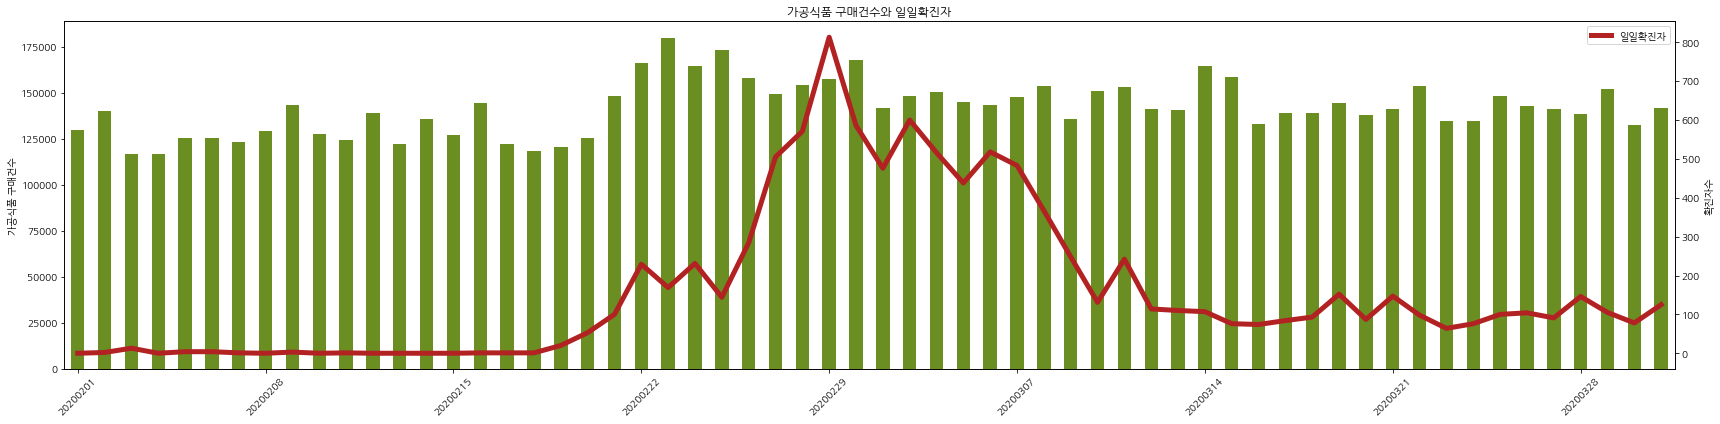

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
가공식품 상관관계:  (0.5130856141441652, 2.7667302019996077e-05)


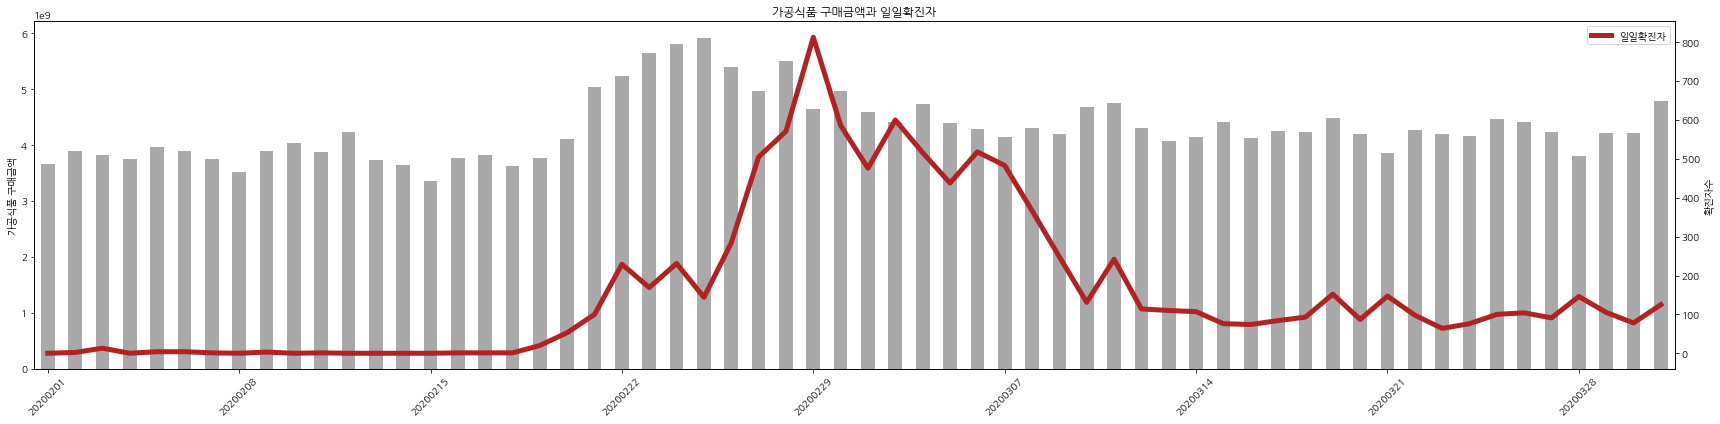

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
건강식품 상관관계:  (0.4568823856959936, 0.0002430163713223264)


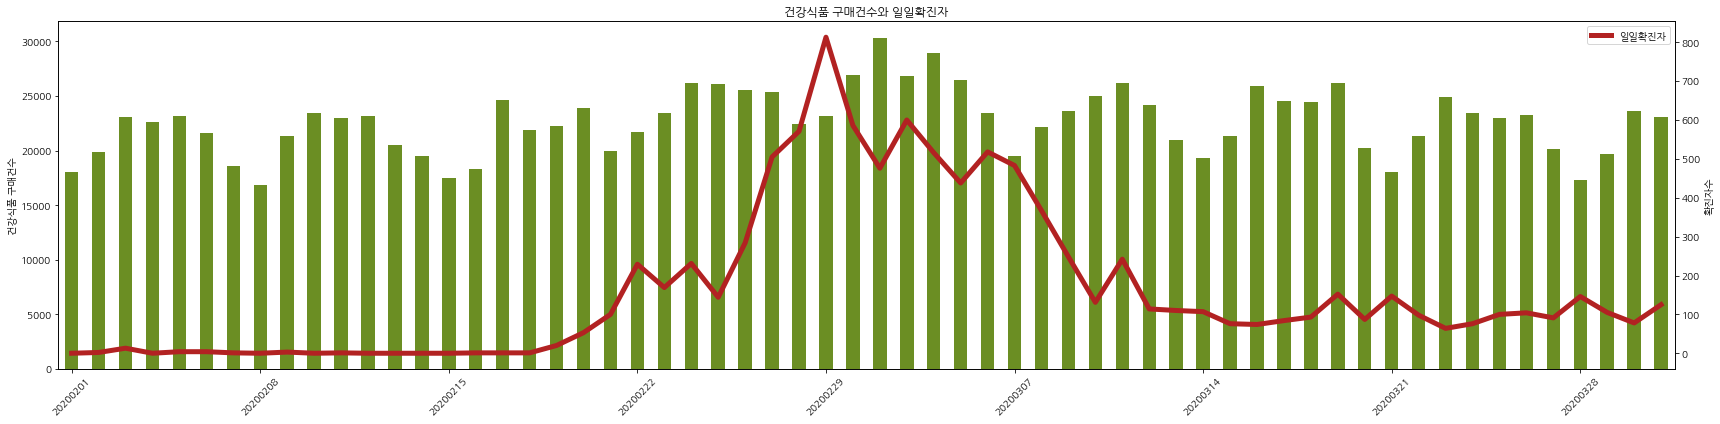

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
건강식품 상관관계:  (0.5180906927817923, 2.236919034810777e-05)


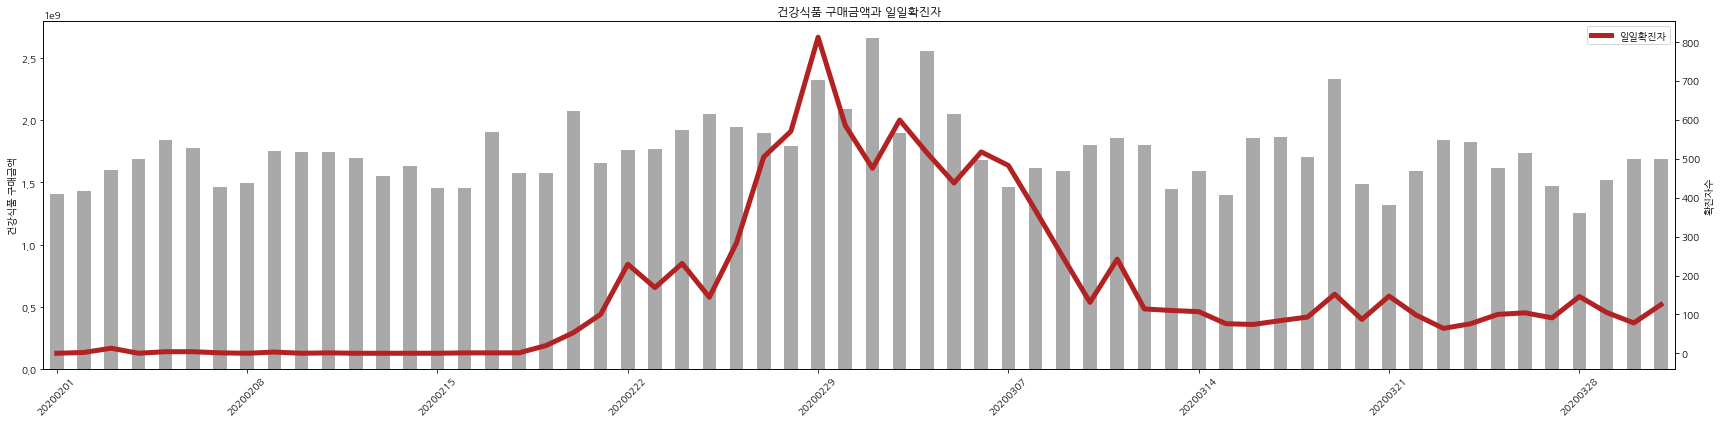

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
기타 스포츠 상관관계:  (0.3140315169770429, 0.01454685155937025)


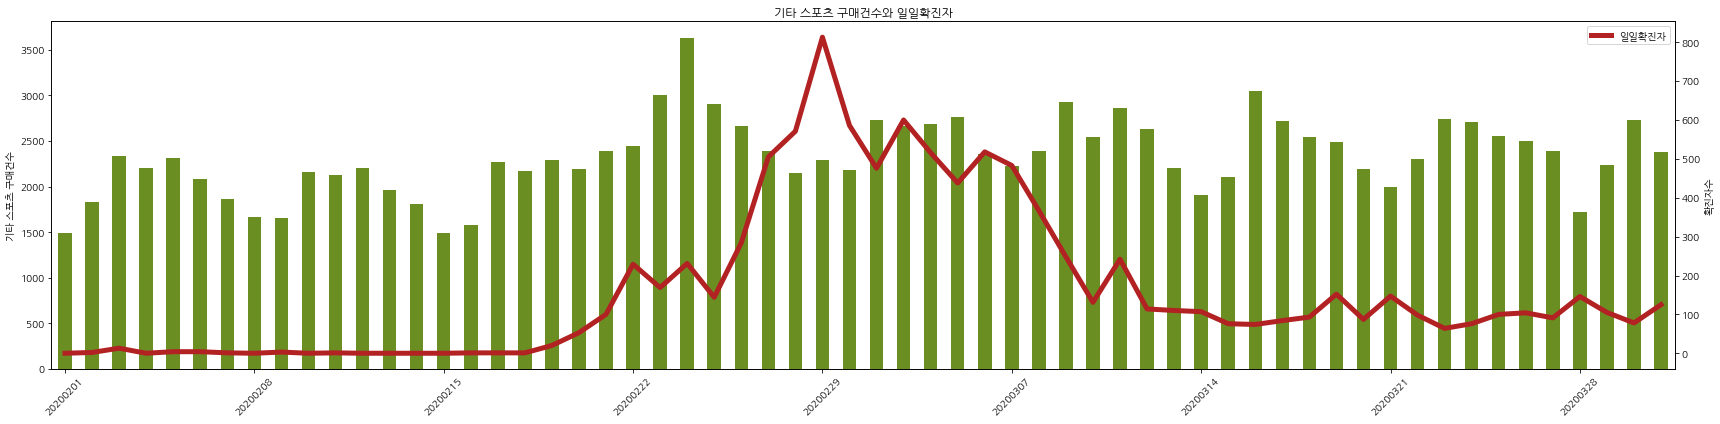

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
기타 스포츠 상관관계:  (0.11632953328779591, 0.3760812114166904)


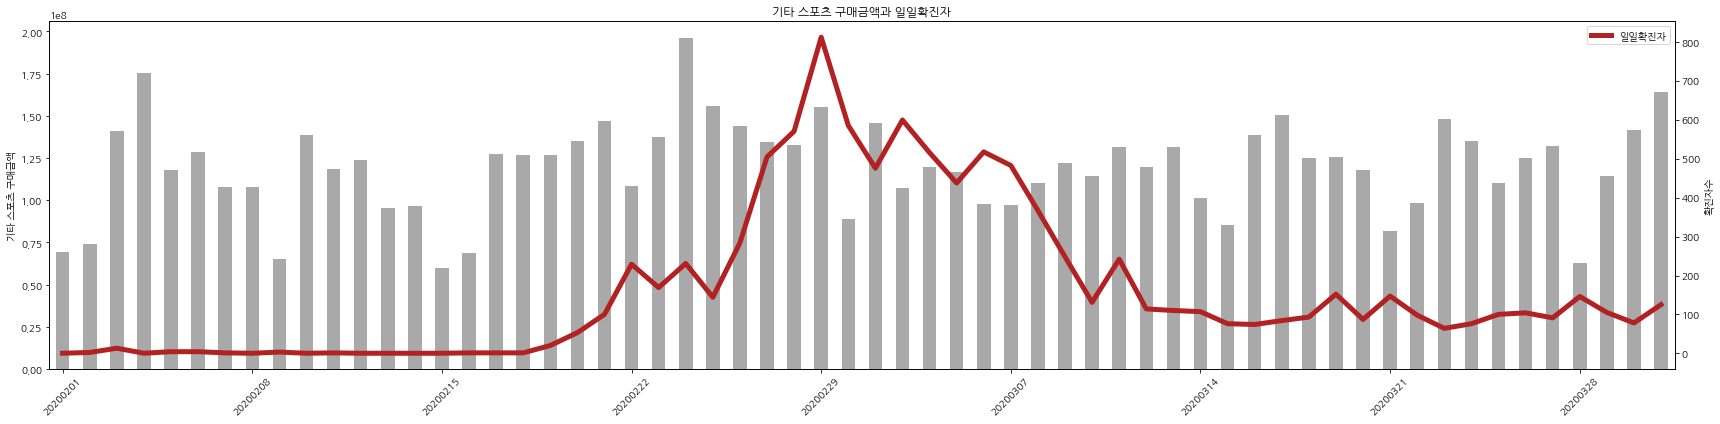

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
남성의류 상관관계:  (0.25799954943897135, 0.04656330755995754)


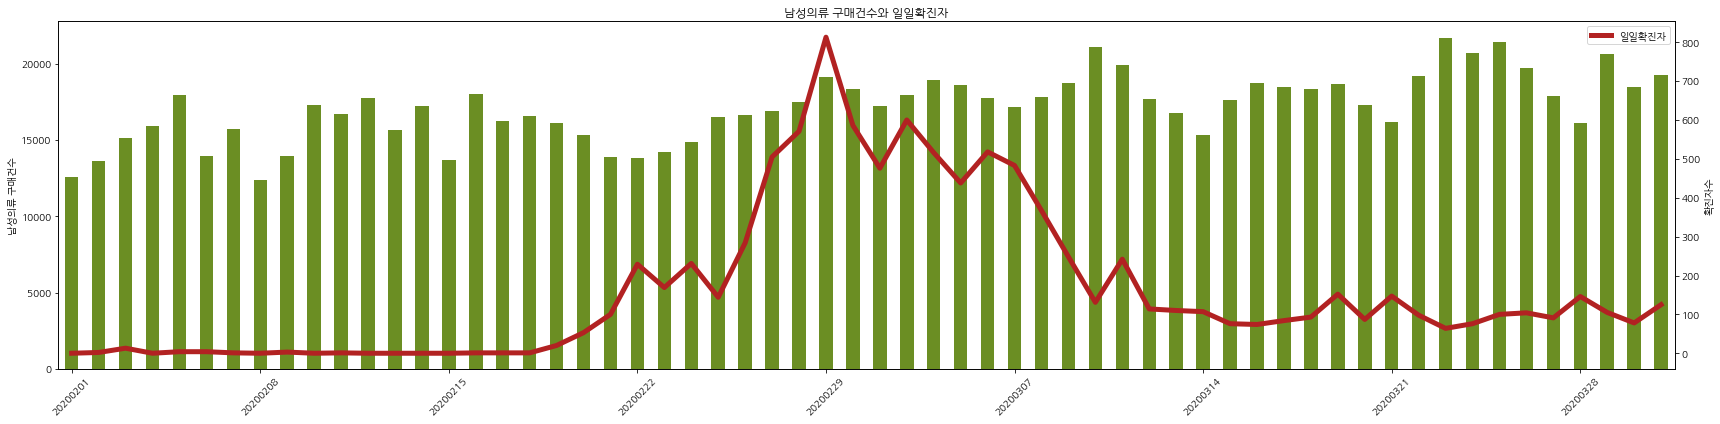

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
남성의류 상관관계:  (0.2932150697103698, 0.022985047165755515)


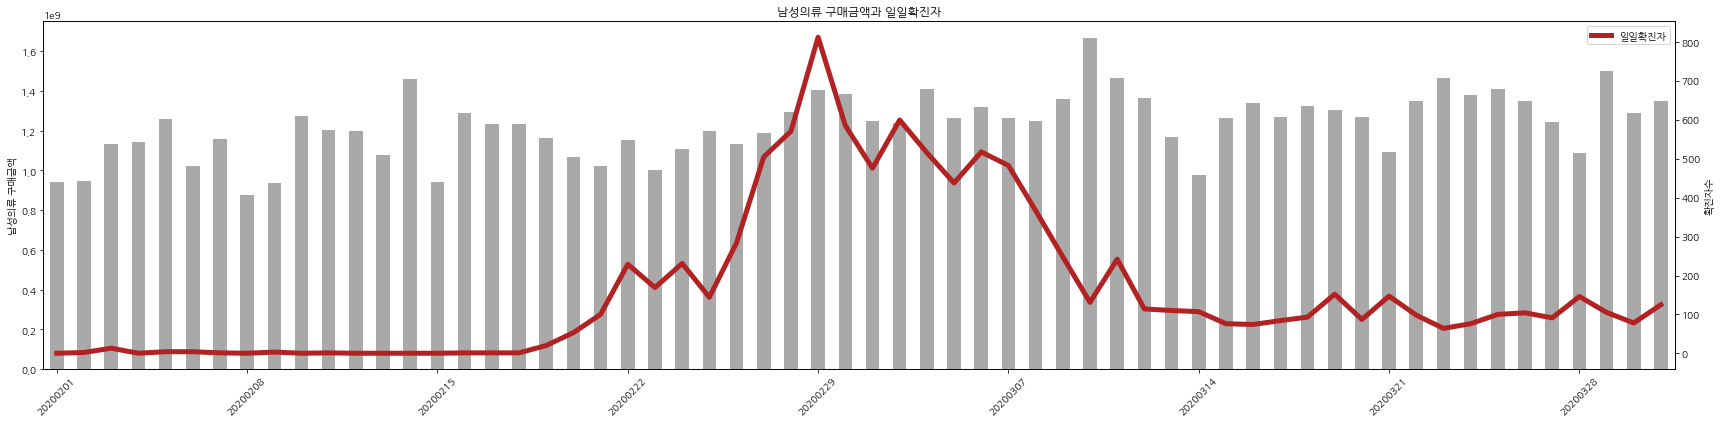

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
계절가전 상관관계:  (0.47553655894465896, 0.00012314724678655464)


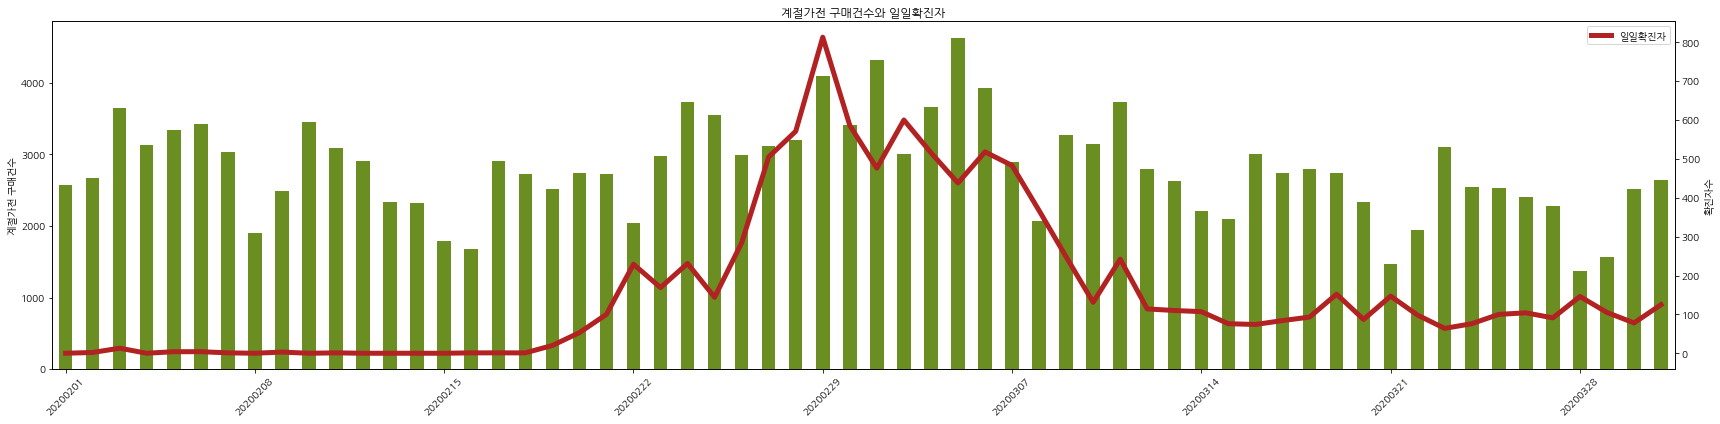

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
계절가전 상관관계:  (0.41598173363620555, 0.0009477734875016109)


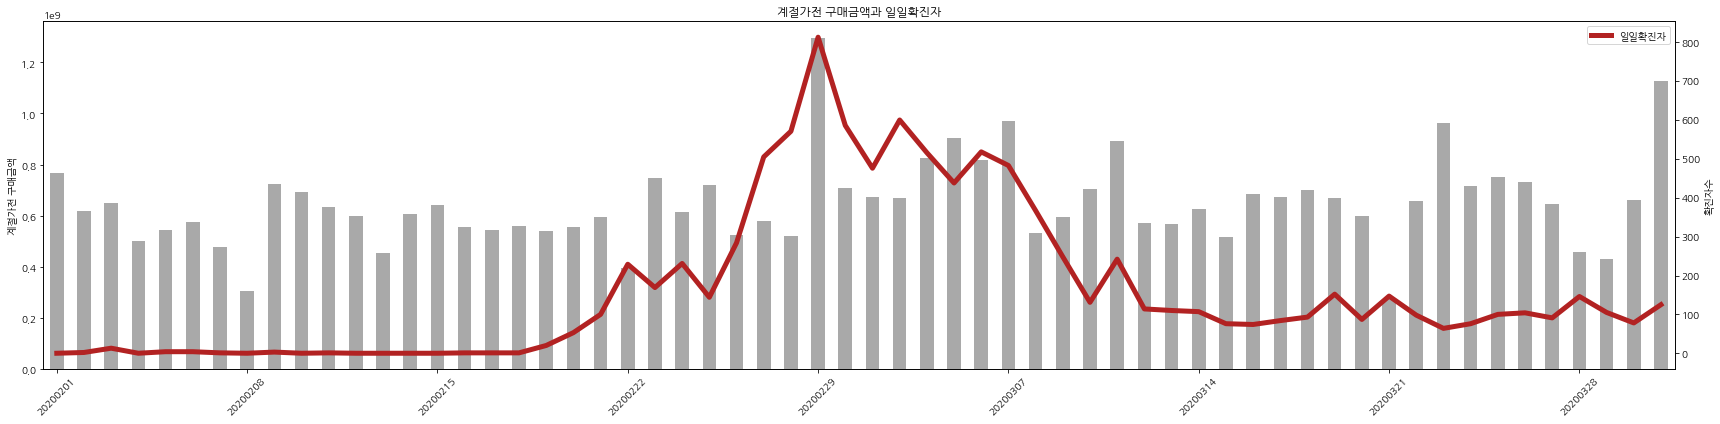

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
농축수산물 상관관계:  (0.47236233078855294, 0.00013863167348674557)


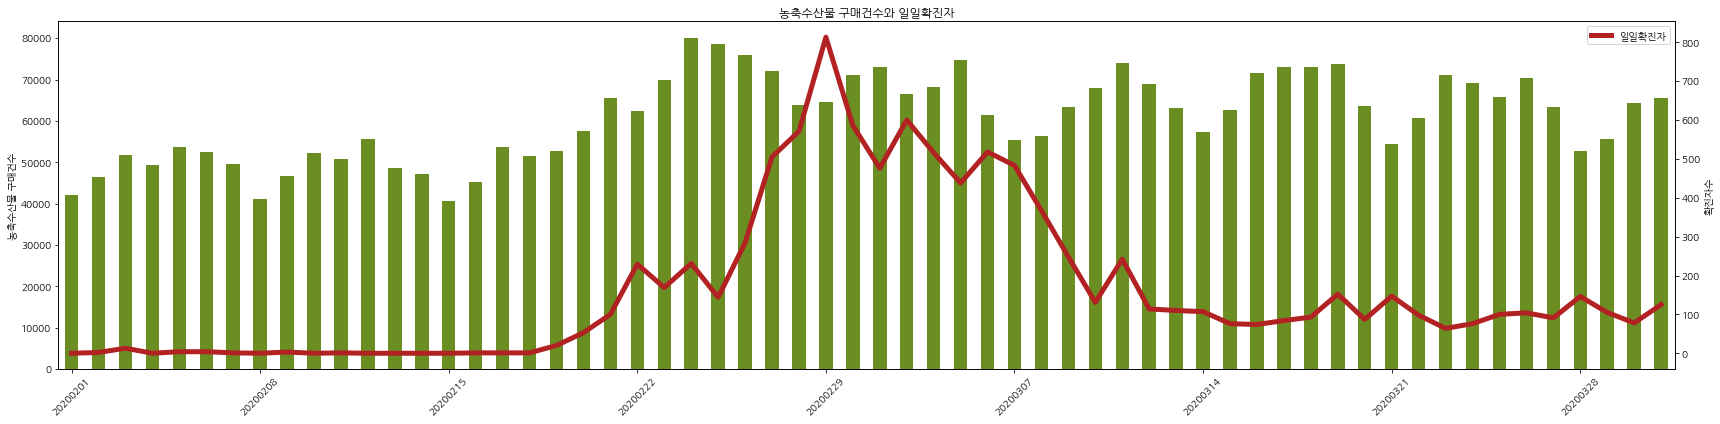

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
농축수산물 상관관계:  (0.4416397320763416, 0.0004117308910142188)


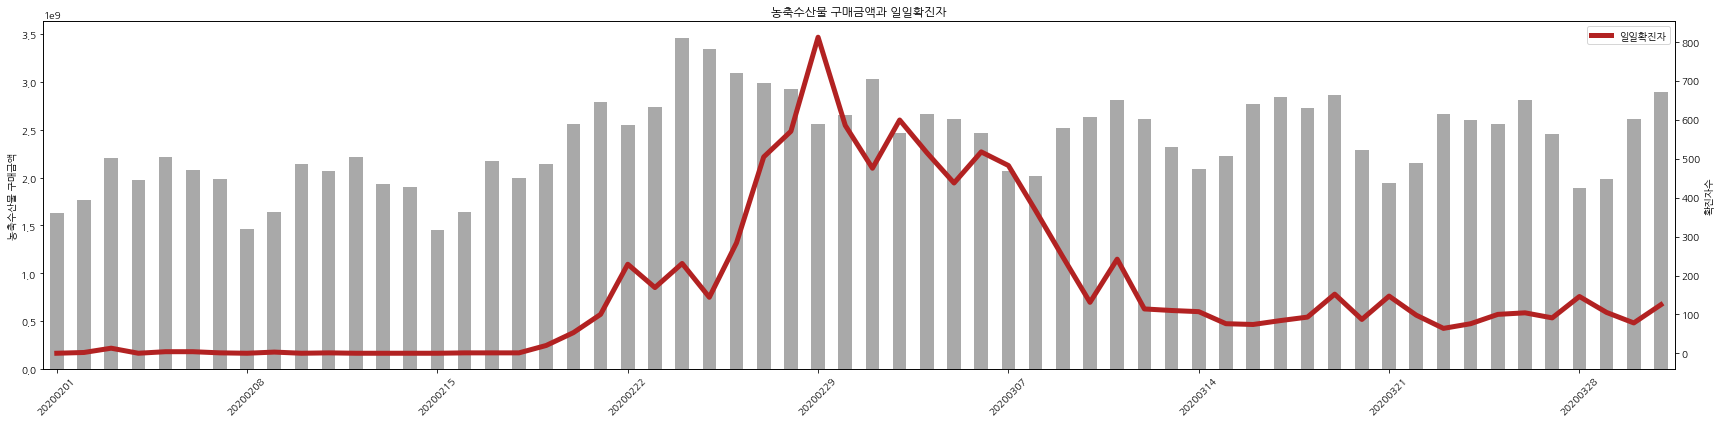

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
생활용품 상관관계:  (0.42406572664749514, 0.0007339672414400296)


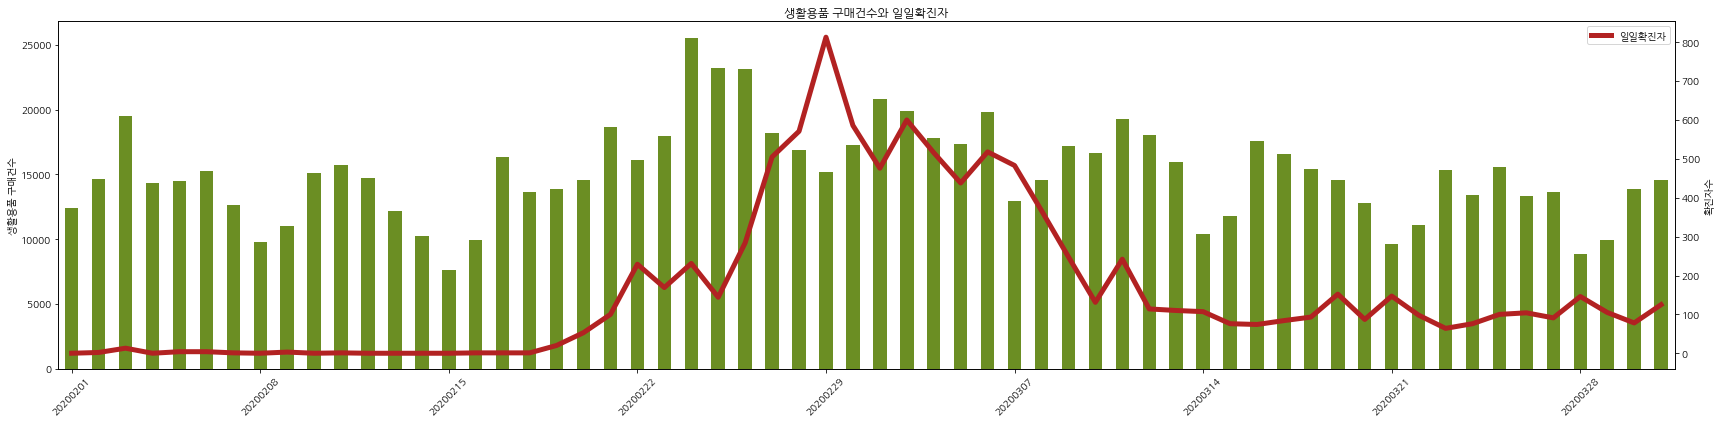

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
생활용품 상관관계:  (0.2583385508065515, 0.04626599415300121)


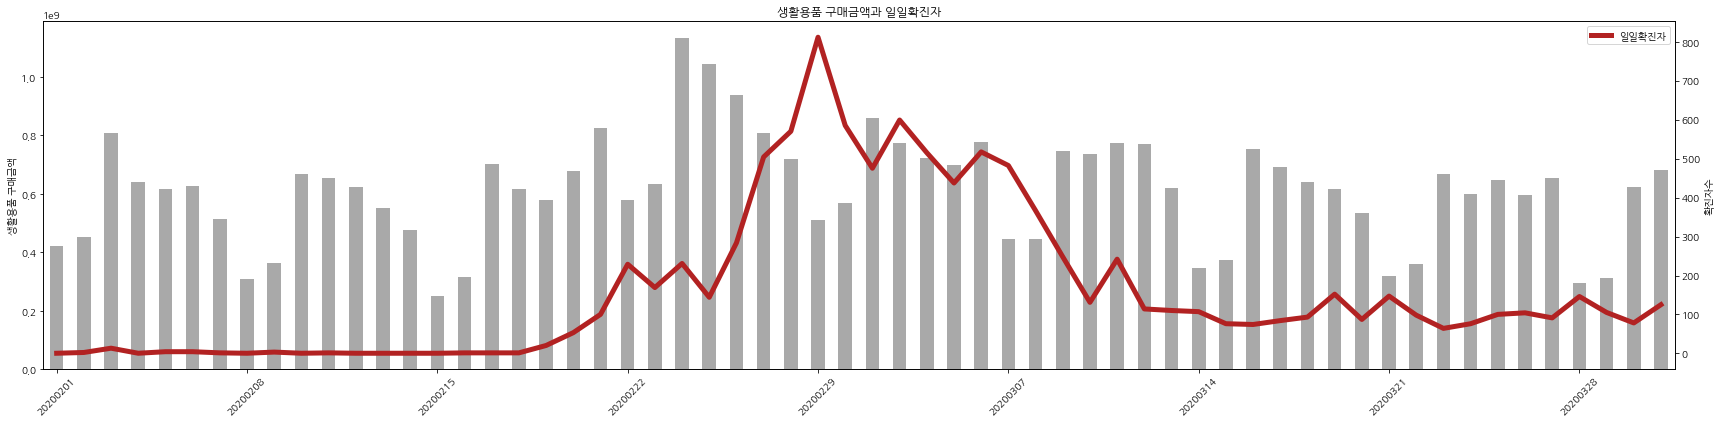

In [ ]:
categories = ['가공식품','건강식품','기타 스포츠','남성의류','계절가전','농축수산물','생활용품']
for category in categories:
  mcorp_plot(category, 20200201, 20200331)
  mcorp_plot_won(category, 20200201, 20200331)

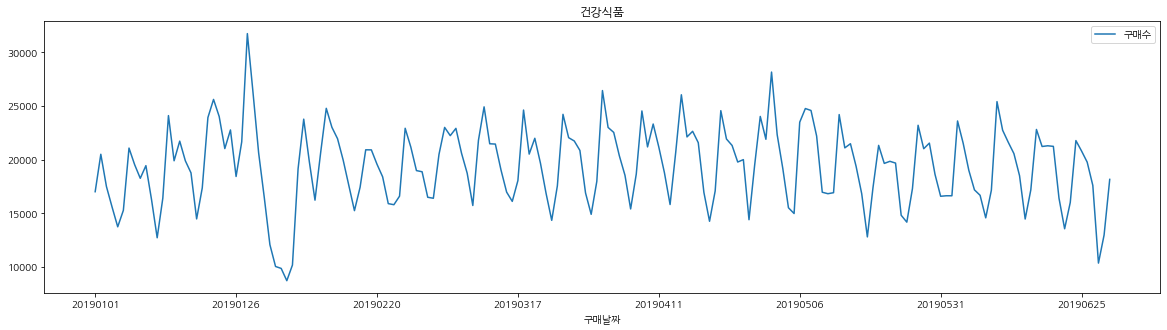

In [ ]:
category = categories[4]
df = categorical_cnt(category,20190101,20190630)
df.index = df.index.astype('str')
df.plot(kind='line')
plt.title(category)
plt.show()

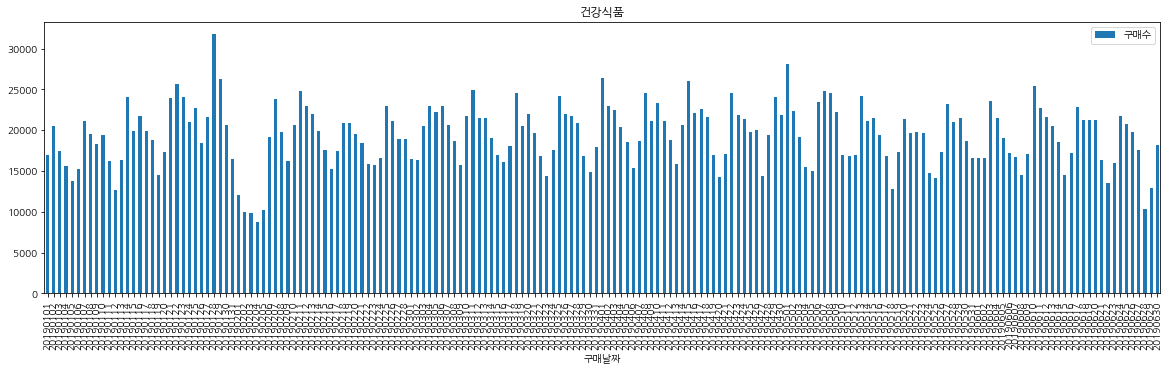

In [ ]:
category = categories[4]
df = categorical_cnt(category,20190101,20190630)
# df.index = df.index.astype('str')
df.plot(kind='bar')
plt.title(category)
plt.show()

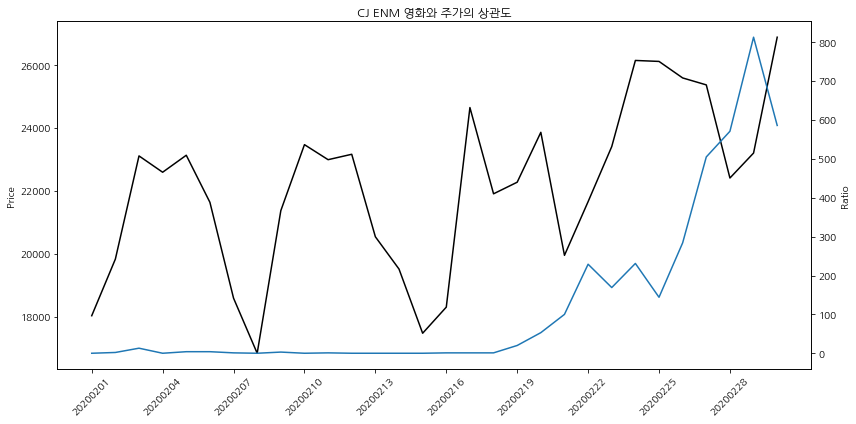

In [ ]:
xtic = np.arange(0,len(df.index),step=3)  # 인터벌 생성
xdays = [df.index[i] for i in xtic]

plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()
plt.xticks(xtic,xdays,rotation=45)

ax1.plot(df_new['구매수'], color='k')
ax1.set_ylabel("Price")

ax2  = ax1.twinx()
ax2.set_ylabel("Ratio")
df_new['일일확진자'].plot(ax=ax2)
plt.title("CJ ENM 영화와 주가의 상관도")
fig.tight_layout()
plt.show()

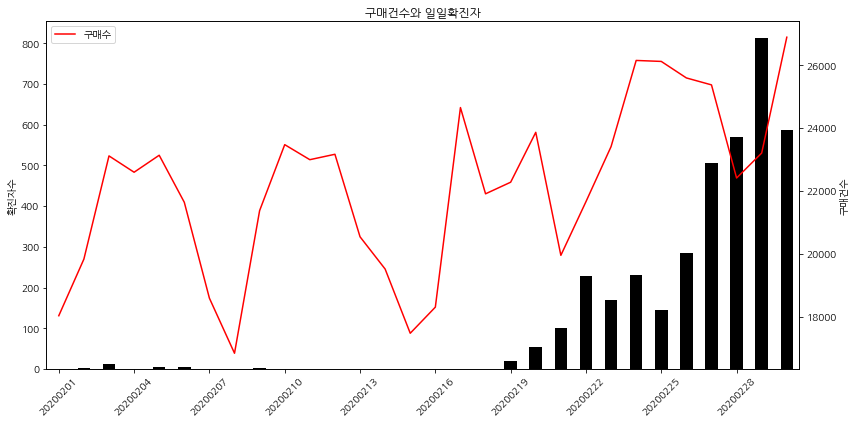

In [ ]:
xtic = np.arange(0,len(df_new.구매날짜),step=3)  # 인터벌 생성
xdays = [df_new.구매날짜[i] for i in xtic]

plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()

df_new['일일확진자'].plot(kind='bar', color='k', ax=ax1)
ax1.set_ylabel("확진자수")

ax2  = ax1.twinx()
ax2.set_ylabel("구매건수")
df_new['구매수'].plot(color='r', ax=ax2)

plt.xticks(xtic)
ax1.set_xticklabels(xdays, rotation=45)

plt.title("구매건수와 일일확진자")
fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
mcorp.카테고리명.value_counts()

서비스티켓     39151
가공식품      38375
도서음반      37908
농축수산물     36406
신발        35594
          ...  
수납가구      19965
출산임부용품    19916
업소위생용품    19102
성인용품      18342
스키보드      12515
Name: 카테고리명, Length: 64, dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구매날짜    61 non-null     object
 1   일일확진자   61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


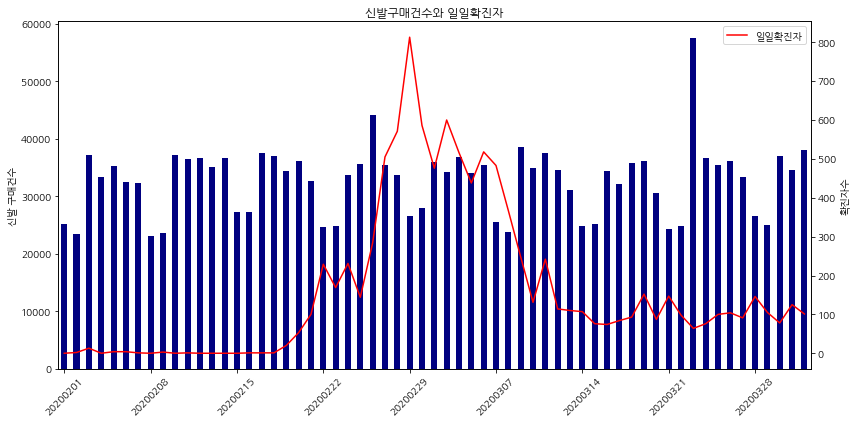

In [ ]:
sday = 20200201
eday = 20200401
step = 7
category = '신발'

df = categorical_cnt(category,sday,eday)
df.index = df.index.astype('str')

df_corona = corona_cnt(sday, eday)
df_corona.info()
df_corona.구매날짜 = df_corona.구매날짜.astype('str')

df_new = df.merge(df_corona, how='outer', on='구매날짜')

xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
xdays = [df_new.구매날짜[i] for i in xtic]

plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()

df_new['구매수'].plot(kind='bar', color='navy', ax=ax1)
ax1.set_ylabel(category + " 구매건수")

ax2  = ax1.twinx()
ax2.set_ylabel("확진자수")
df_new['일일확진자'].plot(color='red', ax=ax2)

plt.xticks(xtic)
ax1.set_xticklabels(xdays, rotation=45)

plt.title(category + "구매건수와 일일확진자")
fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
mcorp.카테고리명.unique()

array(['PC사무기기', 'TV홈시어터', '가공식품', '가방지갑잡화', '건강식품', '골프용품', '공구류', '구기',
       '기타 스포츠', '낚시', '남성의류', '계절가전', '노트북', '농축수산물', '도서음반', '등산용품',
       '메이크업', '문구사무용품', '미용가전', '반려동물', '생활용품', '생활가구', '생활가전', '서비스티켓',
       '성인용품', '세탁청소세면', '수납용품', '수납가구', '수영', '스키보드', '스킨케어', '스포츠의류',
       '신발', '악세서리시계주얼리', '안전용품', '언더웨어', '업소위생용품', '여성의류', '국내외여행',
       '완구키덜트게임', '욕실용품', '욕실가전', '유아용품', '유아패션', '음료', '음향가전', '인테리어용품',
       '자동차용품', '자전거사이클보드인라인', '주방가전', '주방수납잡화', '주방식기용기', '주방조리기구',
       '출산임부용품', '취미악기', '침실가구', '침실인테리어', '카메라캠코더', '캠핑용품', '테마의류',
       '헤어바디용품', '헬스기구용품', '건강관련용품', '휴대폰악세서리'], dtype=object)

## 3. 산점도 그리기
- x축: 확진자
- y축: 소비건수

In [ ]:
corona.head()

,구매날짜,누적확진자,일일확진자
0,20200201,0.0,0
1,20200202,2.0,2
2,20200203,15.0,13
3,20200204,15.0,0
4,20200205,19.0,4


In [ ]:
mcorp.head()

,구매날짜,카테고리명,고객성별,고객나이,OS유형,구매금액,구매수
0,20190101,PC사무기기,F,10,IOS,352443,13
1,20190101,PC사무기기,F,10,WINDOWS,84000,1
2,20190101,PC사무기기,F,10,안드로이드,80870,8
3,20190101,PC사무기기,F,10,없음,3700,1
4,20190101,PC사무기기,F,20,IOS,27714776,381


In [ ]:
corona.tail()

,구매날짜,누적확진자,일일확진자
233,20200921,23045.0,70
234,20200922,23106.0,61
235,20200923,23216.0,110
236,20200924,23341.0,125
237,20200925,23455.0,114


In [ ]:
sday = 20200201
eday = 20200401
step = 7
category = '신발'
def mcorp_scatter(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_cnt(category,sday,eday)
  df_corona = corona_cnt(sday, eday)

  df = categorical_cnt(category,sday,eday)
  df.index = df.index.astype('str')

  df_corona = corona_cnt(sday, eday)
  df_corona.info()
  df_corona.구매날짜 = df_corona.구매날짜.astype('str')

  df_new = df.merge(df_corona, how='outer', on='구매날짜')

  plt.scatter(df_new.일일확진자, df_new.구매수)
  plt.title(category + " 구매건수와 일일확진자")

  fig.tight_layout()
  plt.legend()
  plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구매날짜    61 non-null     object
 1   일일확진자   61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,구매날짜,구매수,일일확진자
0,20200201,25145,0
1,20200202,23467,2
2,20200203,37186,13
3,20200204,33400,0
4,20200205,35308,4
...,...,...,...
56,20200328,26625,146
57,20200329,24946,105
58,20200330,36963,78
59,20200331,34605,125


In [ ]:
def mcorp_plot_won(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_won(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  corr = stats.pearsonr(df_new.구매금액, df_new.일일확진자)
  print("*"*50)
  print(category+" 상관관계: ", corr)
  xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
  xdays = [df_new.구매날짜[i] for i in xtic]

  plt.rcParams["figure.figsize"]=(24,6)
  fig, ax1 = plt.subplots()

  df_new['구매금액'].plot(kind='bar', color='darkgrey',ax=ax1)
  ax1.set_ylabel(category + " 구매금액")

  ax2  = ax1.twinx()
  ax2.set_ylabel("확진자수")
  df_new['일일확진자'].plot(color='firebrick', ax=ax2, linewidth=5)

  plt.xticks(xtic)
  ax1.set_xticklabels(xdays, rotation=45)

  plt.title(category + " 구매금액과 일일확진자")
  fig.tight_layout()
  plt.legend()
  plt.show()
  return corr